# Data Exploration

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
shelter = gpd.read_file('dataset/BD_Cyclone_Shelter_Center.geojson')
shelter.head()

,ShelterNam,Capacity,Lat,Long,geometry
0,Zinzira gprs cum shelter.,1500.0,20.5924,92.3312,POINT (92.33118 20.59243)
1,Sentmartin puratan cyclone center,1200.0,20.6322,92.3247,POINT (92.32471 20.6322)
2,Shah Porir Dwip GPS,1500.0,20.7657,92.3347,POINT (92.33471 20.76571)
3,Dangar Para Red Cresent RPS,850.0,20.7673,92.3227,POINT (92.32271 20.76732)
4,24 no Shahp Darir Dwip Jaliapara GPS,1500.0,20.7807,92.3380,POINT (92.33801 20.78072)


In [23]:
print('Max Capacity: ', shelter['Capacity'].max())
print('Min Capacity: ', shelter['Capacity'].min())
print('Total no. of shelters: ', shelter.shape[0])
print('Total capacity of shelters (in million): ', round(shelter['Capacity'].sum()/1e6, 1))

# print('Total capacity of shelters in Feni (in million): ', round(shelter.loc[shelter['Category'] == 'A', 'Revenue'].sum() ))



Max Capacity:  2500.0
Min Capacity:  0.0
Total no. of shelters:  3777
Total capacity of shelters (in million):  3.8


In [10]:
gdf_map = gpd.read_file('dataset/bangladesh_geojson_adm2_64_districts_zillas.json')
gdf_map = gdf_map.rename(columns={'ADM2_EN': 'District'})
# selected districts
selected_districts = ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur', 
                      'Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram',
                      'Habiganj', 'Moulvibazar']

gdf_map['selected_district'] = gdf_map['District'].apply(lambda x: x if x in selected_districts else np.nan)


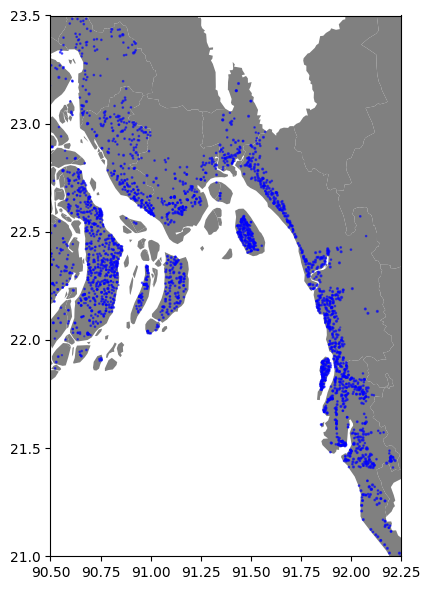

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))

gdf_map.plot(ax=ax, color='gray') # color=gdf['color']

shelter.plot(
    ax=ax,                # Size of the plot
    marker='o',                      # Marker type
    markersize=shelter['Capacity']/1000,   # Size based on the column
    color='blue',                    # Color of the markers
    alpha=0.6,                       # Transparency level
)


ax.set_xlim(90.5, 92.25)
ax.set_ylim(21, 23.5)



plt.tight_layout()
plt.savefig('plots/population_density.svg', format='svg')
plt.show()


# Feature Engineering